# Stock price data for Goldman Sachs

#Libraries Installation

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import shap

# Download financial data
data = yf.download("GS", start="2019-01-01", end="2024-09-20")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-13,475.989990,482.100006,475.500000,478.989990,478.989990,1794500
2024-09-16,481.429993,487.380005,479.489990,485.160004,485.160004,1500300
2024-09-17,488.000000,489.730011,481.799988,485.390015,485.390015,1444900
2024-09-18,485.399994,492.989990,481.769989,484.579987,484.579987,1699500
2024-09-19,494.739990,506.410004,493.459991,503.829987,503.829987,3060700


#RF Regression 2024

In [ ]:
# Preprocess the data
data["Returns"] = data["Close"].pct_change()
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create the target variable
train_target = train_data["Returns"].shift(-1)
test_target = test_data["Returns"].shift(-1)

# Remove the last row from the training and testing sets
train_data = train_data[:-1]
test_data = test_data[:-1]
train_target = train_target[:-1]
test_target = test_target[:-1]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Train the model
model.fit(train_data.values, train_target.values)

# Make predictions on the test set
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error: 0.00024363374976057339
R2 Score: -0.17825831480329102


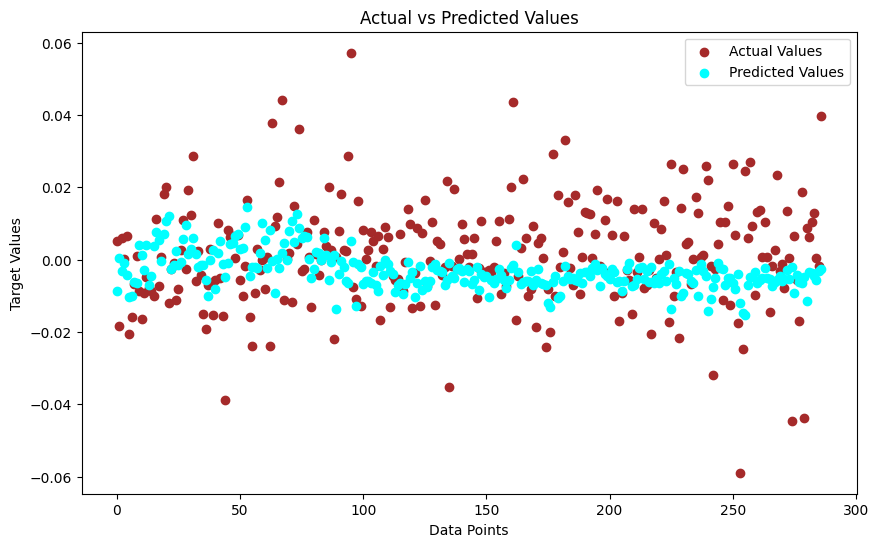

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have actual test target values
# Evaluate the model
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Create a graph of predicted values
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(test_target)), test_target, color='brown', label='Actual Values')
plt.scatter(np.arange(len(test_target)), predictions, color='cyan', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.show()



---
Interpreting the Model with SHAP

  0%|          | 0/287 [00:00<?, ?it/s]

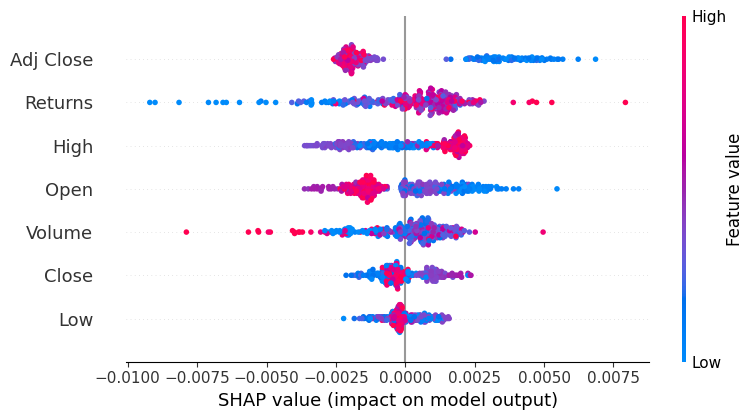

In [ ]:
# Wrap the model in a callable function
def model_predict(input_data):
    return model.predict(input_data)

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model_predict, test_data.values)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(test_data)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, test_data)

Each dot represents a feature and its position on the x-axis represents its SHAP value. The color of the dot indicates the feature value (red for high values, blue for low values).



---
Interpreting the Model with LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=73524004fb6025a1267961bfec8690ef977558d594531277bc39ce373f8aae0e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train_data.values,
                                                   mode='regression',
                                                   feature_names=train_data.columns,
                                                   class_names=["Negative", "Positive"],
                                                   discretize_continuous=True)

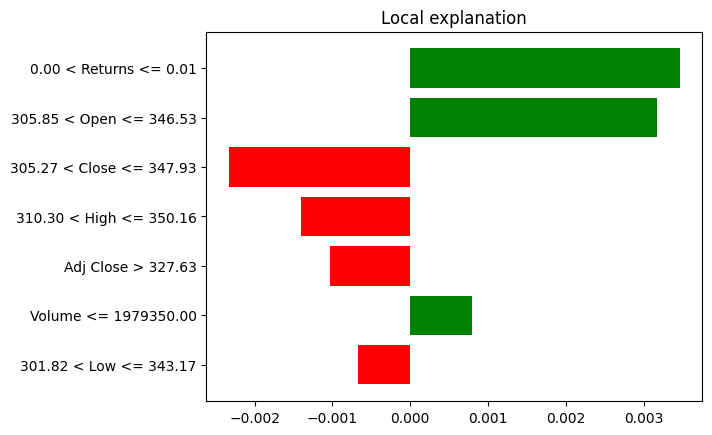

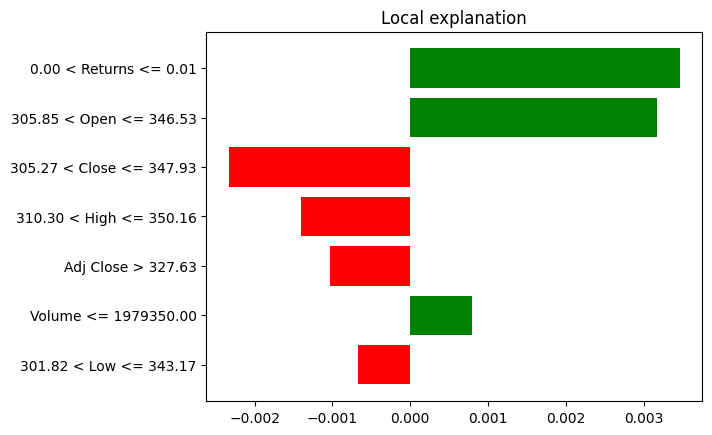

In [ ]:
# Select a random test instance
instance = test_data.sample(random_state=42)

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance.values[0], model.predict)

# Plot the LIME explanation
explanation.as_pyplot_figure()

#XG BOOST

In [ ]:
import yfinance as yf

# Download historical stock price data for Apple Inc.
data = yf.download("GS", start="2019-01-01", end="2024-09-20")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Preprocess the data
data["Returns"] = data["Close"].pct_change()
data.dropna(inplace=True)

# Create the target variable
data["Target"] = data["Returns"].shift(-1)

# Remove the last row from the data
data = data[:-1]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(["Returns", "Target"], axis=1)
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = XGBRegressor()

# Train the model
model.fit(X_train.values, y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.values)

Mean Squared Error: 0.0005661739348627411
R-squared score: -0.3813669241818445


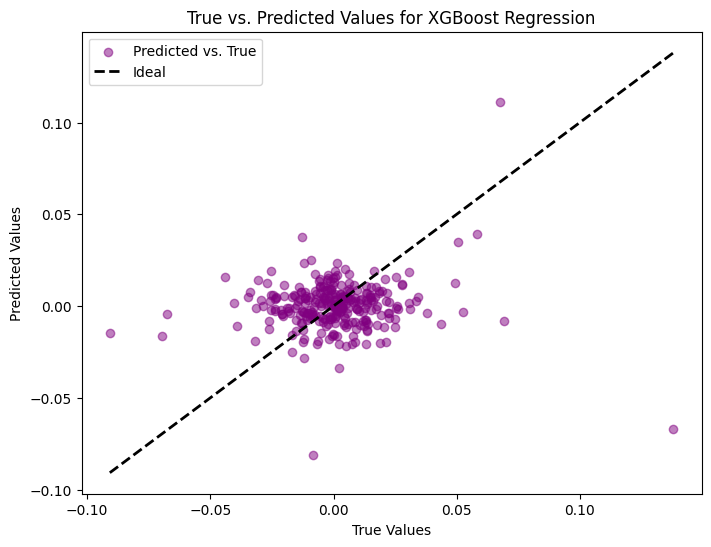

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print(f"R-squared score: {r2}")

# Plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='purple', alpha=0.5, label='Predicted vs. True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for XGBoost Regression')
plt.legend(loc='best')
plt.show()



---
Interpreting the Model with SHAP


  0%|          | 0/288 [00:00<?, ?it/s]

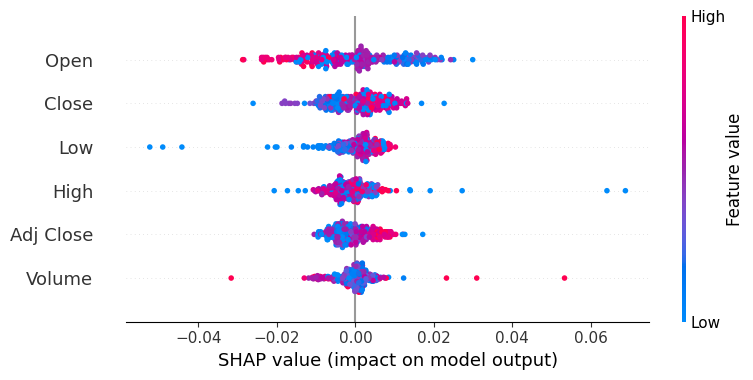

In [ ]:
import shap

# Wrap the model in a callable function
def model_predict(input_data):
    return model.predict(input_data)

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model_predict, X_train.values)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.values)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)



---
Interpreting the Model with LIME


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b4841abdfe5db9bf6ef38df45ce6425478fc83bf4ab0a42b0359acd88095e9fa
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


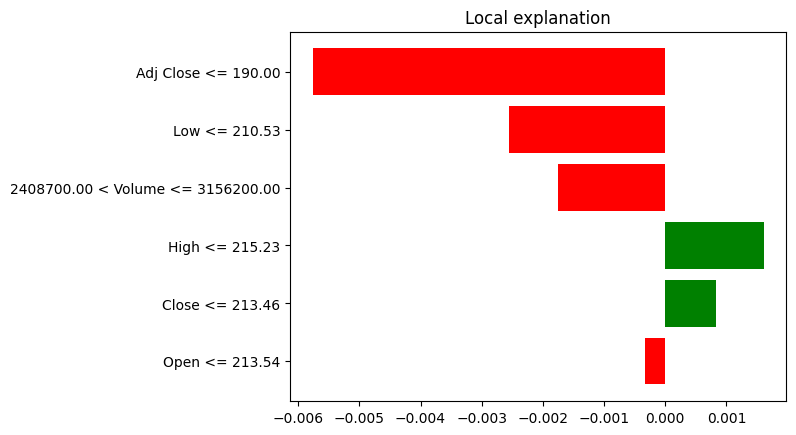

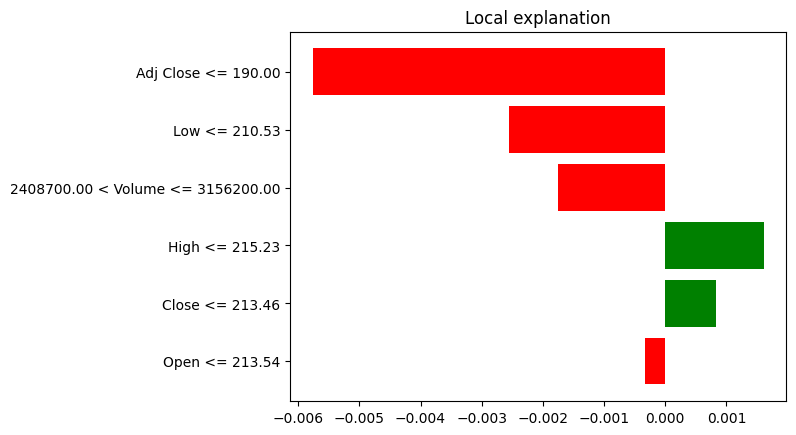

In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='regression',
                                                   feature_names=X_train.columns,
                                                   class_names=["Negative", "Positive"],
                                                   discretize_continuous=True)

# Select a random test instance
instance = X_test.sample(random_state=42)

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance.values[0], model.predict)

# Plot the LIME explanation
explanation.as_pyplot_figure()

#LIGHT GBM

In [ ]:
import yfinance as yf

# Download historical stock price data for Apple Inc.
data = yf.download("GS", start="2019-01-01", end="2024-09-20")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Preprocess the data
data["Returns"] = data["Close"].pct_change()
data.dropna(inplace=True)

# Create the target variable
data["Target"] = data["Returns"].shift(-1)

# Remove the last row from the data
data = data[:-1]

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(["Returns", "Target"], axis=1)
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LGBMRegressor()

# Train the model
model.fit(X_train.values, y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.values)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1149, number of used features: 6
[LightGBM] [Info] Start training from score 0.001041


Mean Squared Error: 0.00046343545170247935
R2 Score: -0.13070271352261487


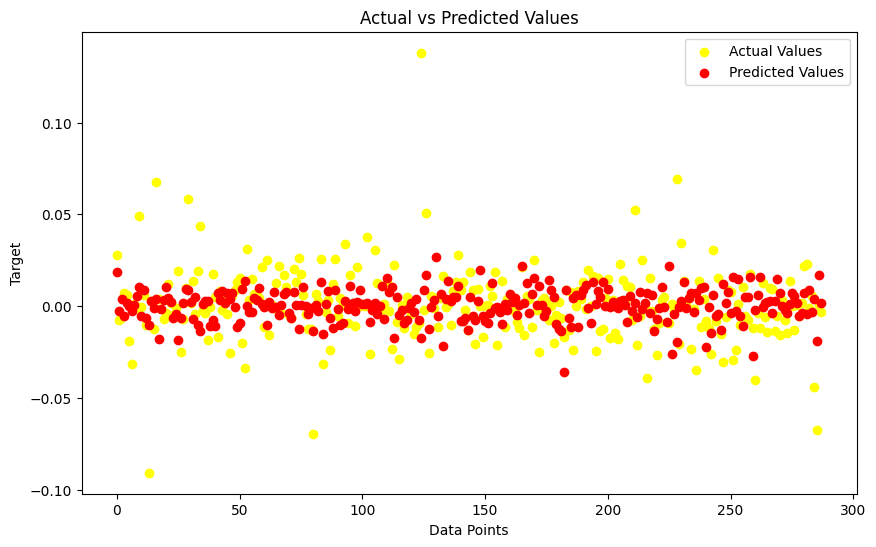

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the accuracy metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='yellow', label='Actual Values')
plt.scatter(np.arange(len(predictions)), predictions, color='red', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target')
plt.legend()
plt.show()



---
Interpreting the Model with SHAP


  0%|          | 0/289 [00:00<?, ?it/s]

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it wi

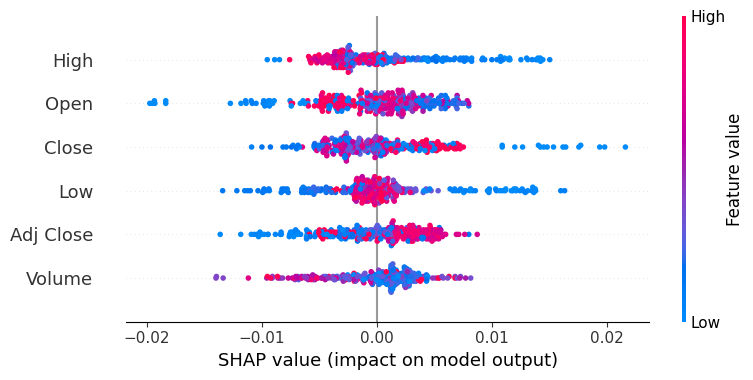

In [ ]:
import shap

# Wrap the model in a callable function
def model_predict(input_data):
    return model.predict(input_data)

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model_predict, X_train.values)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.values)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

SHAP doesnt work well with light GBM for this dataset.



---
Interpreting the Model with LIME


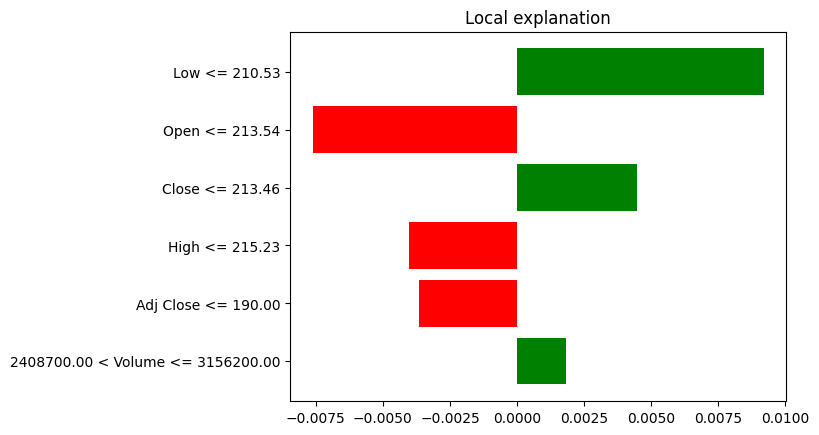

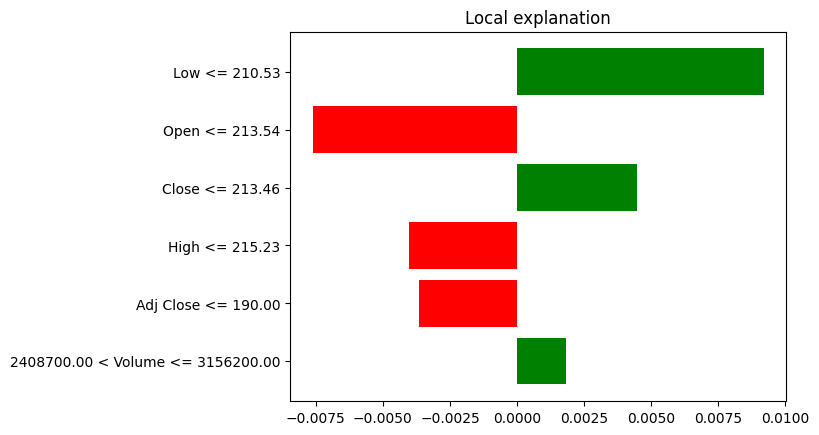

In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='regression',
                                                   feature_names=X_train.columns,
                                                   class_names=["Negative", "Positive"],
                                                   discretize_continuous=True)

# Select a random test instance
instance = X_test.sample(random_state=42)

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance.values[0], model.predict)

# Plot the LIME explanation
explanation.as_pyplot_figure()

##KNN

In [ ]:
import yfinance as yf

# Download historical stock price data for Apple Inc.
data = yf.download("GS", start="2018-01-01", end="2023-09-30")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Preprocess the data
data["Returns"] = data["Close"].pct_change()
data.dropna(inplace=True)

# Create the target variable
data["Target"] = data["Returns"].shift(-1)

# Remove the last row from the data
data = data[:-1]

<ipython-input-16-26ee83e0a652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Returns"] = data["Close"].pct_change()
<ipython-input-16-26ee83e0a652>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-16-26ee83e0a652>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Targe

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(["Returns", "Target"], axis=1)
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = KNeighborsRegressor()

# Train the model
model.fit(X_train.values, y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.values)

Mean Squared Error: 0.0004957636599276557
Accuracy (R-squared): -0.38462675551817616


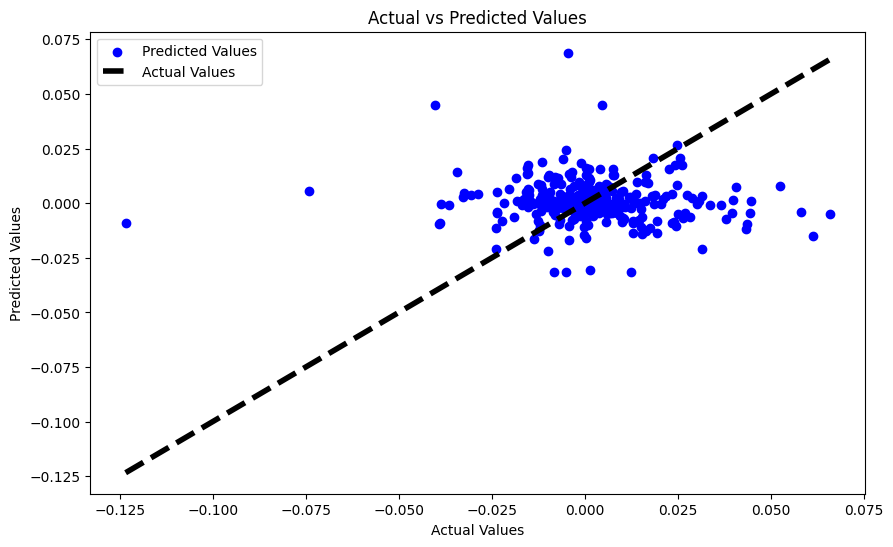

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared value (accuracy) of the model
accuracy = r2_score(y_test, predictions)
print(f"Accuracy (R-squared): {accuracy}")

# Create a graph of predicted values versus actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4, label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()



---
Interpreting the Model with SHAP


  0%|          | 0/287 [00:00<?, ?it/s]

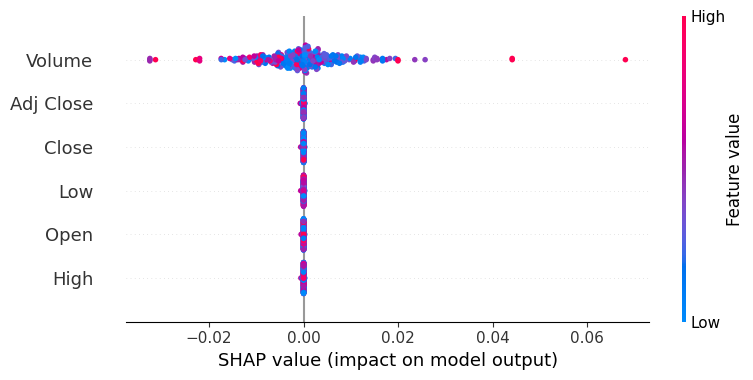

In [ ]:
import shap

# Wrap the model in a callable function
def model_predict(input_data):
    return model.predict(input_data)

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model_predict, X_train.values)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.values)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)



---
Interpreting the Model with LIME


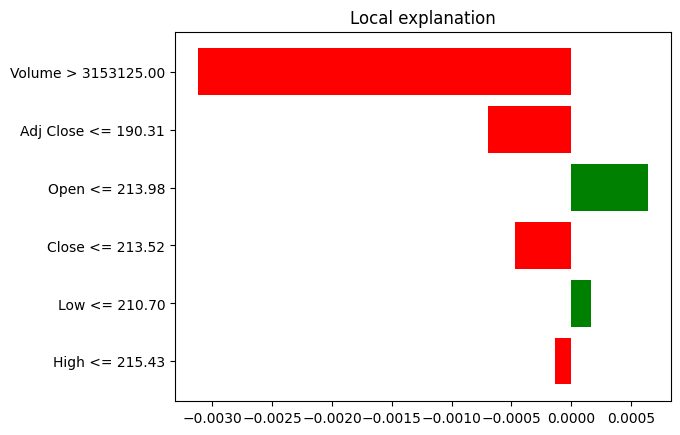

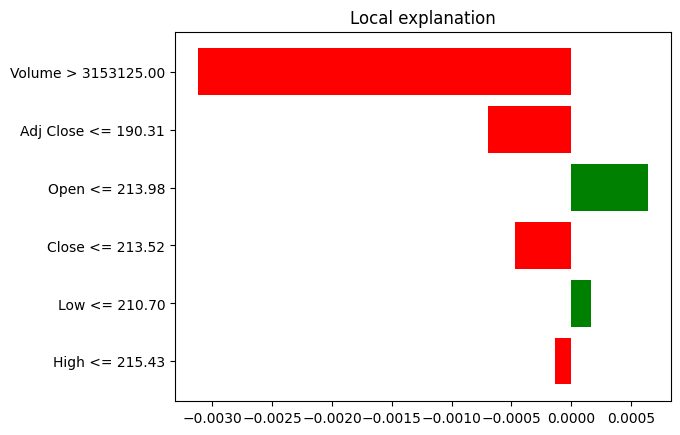

In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='regression',
                                                   feature_names=X_train.columns,
                                                   class_names=["Negative", "Positive"],
                                                   discretize_continuous=True)

# Select a random test instance
instance = X_test.sample(random_state=42)

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance.values[0], model.predict)

# Plot the LIME explanation
explanation.as_pyplot_figure()

#Adaboost Regression

In [ ]:
import yfinance as yf

# Download historical stock price data for Apple Inc.
data = yf.download("GS", start="2018-01-01", end="2023-09-30")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Preprocess the data
data["Returns"] = data["Close"].pct_change()
data.dropna(inplace=True)

# Create the target variable
data["Target"] = data["Returns"].shift(-1)

# Remove the last row from the data
data = data[:-1]

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(["Returns", "Target"], axis=1)
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = AdaBoostRegressor()

# Train the model
model.fit(X_train.values, y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.values)

Mean Squared Error: 0.000517574933647871
R2 Score: -0.2392809048862483


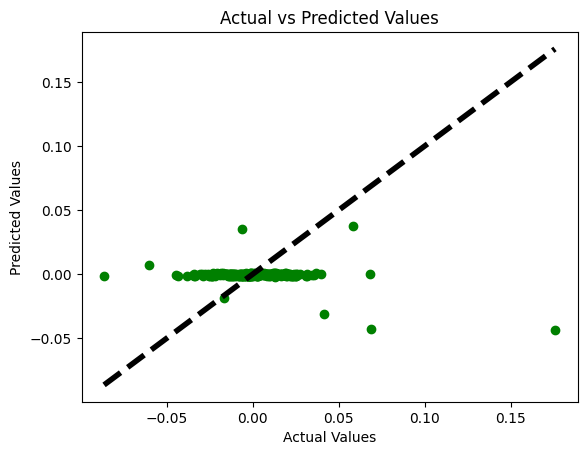

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the accuracy of the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Create a graph comparing the actual values with the predicted values
plt.scatter(y_test, predictions, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



---
Interpreting the Model with SHAP


  0%|          | 0/287 [00:00<?, ?it/s]

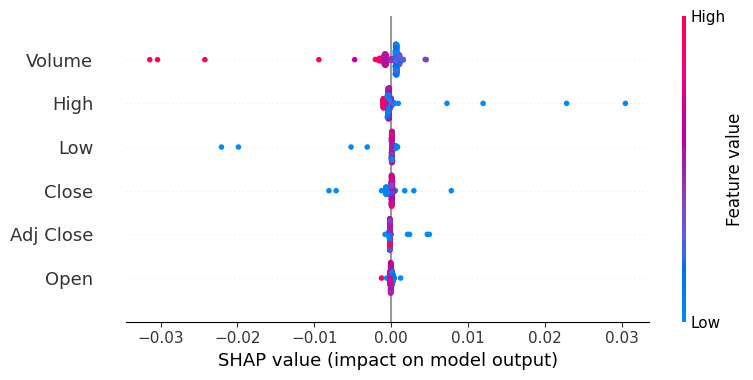

In [ ]:
import shap

# Wrap the model in a callable function
def model_predict(input_data):
    return model.predict(input_data)

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model_predict, X_train.values)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.values)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)



---
Interpreting the Model with LIME


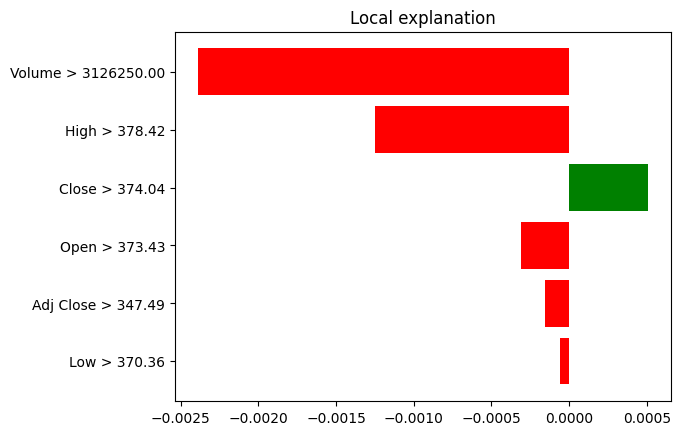

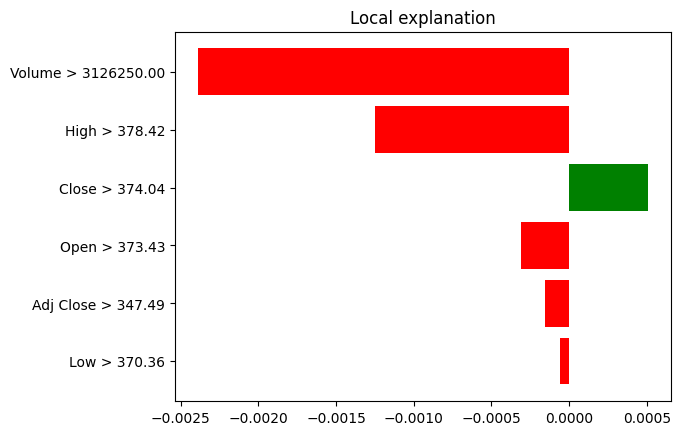

In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='regression',
                                                   feature_names=X_train.columns,
                                                   class_names=["Negative", "Positive"],
                                                   discretize_continuous=True)

# Select a random test instance
instance = X_test.sample(random_state=42)

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance.values[0], model.predict)

# Plot the LIME explanation
explanation.as_pyplot_figure()